In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Framework

We are interested in calculating the expected value of some random variable:

$$\theta = \mathbb{E}\left[h(X)\right]$$

where $X$ is a random variable (or, more generally, a random vector in $\mathbb{R}^m$) and $h:\mathbb{R}^m\to\mathbb{R}$ is some arbitrary measurable function.  In principle, we can always do this by integration.  In particular, we have

$$\theta = \int_{\mathbb{R}^m}h(\mathbf{x})f_{X}(\mathbf{x})\,\textrm{d}\mathbf{x}$$

However, for even moderately complicated functions $h$ and $f_{X}$, this integral is usually impossible to compute.  One can, of course, numerically approximate an integral like this with a wide variety of methods, but when the dimension $m$ is large numerical approximation methods tend to be intractably slow.

In order to approximate $\theta$, we will rely on the following theorem:

## Theorem: The Strong Law of Large Numbers

Suppose $Y_1$, $Y_2$, $\dotsc$ are i.i.d. random variables with $\mathbb{E}[Y_1] = \mu < \infty$.  Then

$$\lim_{n\to\infty}\frac{1}{n}\sum_{i = 1}^{n}Y_i = \mu$$

with probability 1.

# Monte Carlo Framework

We can use this idea to approximate $\theta = \mathbb{E}[h(X)]$.  To do so, we define $n$ i.i.d. copies of $X$ named $X_i$ and then create $n$ i.i.d. random variables $Y_i = h(X_i)$.  Our goal is to calculate $\mathbb{E}[Y_1]$.  Assuming this expected value exists, we can apply the strong law of large numbers to obtain

$$\theta = \lim_{n\to\infty}\frac{1}{n}\sum_{i = 1}^{n}h(X_i)$$

Of course, we can't actually calculate infinitely many copies of $h(X_i)$ in practice, but we can approximate this limit by choosing a fixed but large value of $n$.  That is, we can approximate $\theta$ with

$$\hat{\theta}_n = \frac{1}{n}\sum_{i = 1}^{n}h(X_i)$$

This gives us the following general algorithm:

for $i = 1\,$ to $n$
$\:\:\:$ generate $X_i$
$\:\:\:$ $h_i = h(X_i)$

$\hat{\theta}_n = (h_1 + h_2 + ... + h_n) / n$

Notice that $\hat{\theta}_n$ is itself a random variable.  This means that every time we run our algorithm we will get a different approximation.  If we use a random variable to approximate a parameter, we call the random variable an *estimator*.  There are two important properties that we would like to have in a good estimator:

1) The estimator $\hat{\theta}_n$ is a *consistent* estimator of $\theta$ if $\hat{\theta}_n\to\theta$ with probability 1 as $n\to\infty$.  In our case, this is guaranteed by the strong law of large numbers.

2) The estimator $\hat{\theta}_n$ is an *unbiased* estimator of $\theta$ if $\mathbb{E}[\hat{\theta}_n] = \theta$.

A simple calculation shows that $\hat{\theta}_n$ really is unbiased:

$$\begin{aligned}
\mathbb{E}\left[\hat{\theta}_n\right] &= \mathbb{E}\left[\frac{1}{n}\sum_{i = 1}^{n}h(X_i)\right] \\
&= \frac{1}{n}\sum_{i = 1}^{n}\mathbb{E}[h(X_i)] \\
&= \frac{1}{n}\sum_{i = 1}^{n}\theta \\
&= \frac{n\theta}{n} \\
&= \theta
\end{aligned}$$

## Inverse Transform Method

Suppose that we want to generate a random variable $X:\Omega\to\mathbb{R}$ with a given cdf $F_{X}:\mathbb{R}\to\mathbb{R}$.  For simplicity, suppose that $F_{X}$ is continuous and strictly increasing, so that it is invertible.  (The "strictly increasing" part is not necessary, but makes our proof easier.)  Notice that

$$F_{X}\circ X:\Omega\to\mathbb{R}$$

is itself a function on $\Omega$, and so $Y = F_{X}(X)$ is a random variable in its own right.  It therefore makes sense to ask about the distribution of $Y$.  It's clear from the definition of a cdf that $0 \leq Y \leq 1$.  For any $0 \leq y \leq 1$, we have

$$\begin{aligned}
F_{Y}(y) &= \mathbb{P}\left[Y \leq y\right] \\
&= \mathbb{P}\left[F_{X}(X) \leq y\right] \\
&= \mathbb{P}\left[X \leq F^{-1}_{X}(y)\right] \\
&= F_{X}\left(F^{-1}_{X}(y)\right) \\
&= y
\end{aligned}$$

This means that

$$F_{Y}(y) = \left\{ \begin{array}{cc} 0 & y \leq 0 \\ y & 0 < y < 1 \\ 1 & y \geq 0 \end{array} \right.$$

and so $Y\sim U(0, 1)$ is uniformly distributed.

Following the same logic in reverse gives us a method for generating $X$: We first generate a uniform random variable $U\sim U(0, 1)$, and then set $X = F_{X}^{-1}(U)$.  To verify that this works, we need to check the cdf of the resulting $x$.

$$\begin{aligned}
\mathbb{P}\left[X \leq x\right] &= \mathbb{P}\left[F_{X}^{-1}(U) \leq x\right] \\
&= \mathbb{P}\left[U \leq F_{X}(x)\right] \\
&= F_{U}\left(F_{X}(x)\right) \\
&= F_{X}(x)
\end{aligned}$$

### Example

Generate the exponential random variable $X\sim \textrm{Exp}(\lambda)$ with the inverse transform method.  That is, generate a random variable $X$ with cdf

$$F_{X}(x) = 1 - e^{-\lambda x}$$

for some fixed $\lambda > 0$.

### Solution

We first need to compute $F_{X}^{-1}$.  If

$$u = 1 - e^{-\lambda x}$$

then

$$x = -\frac{1}{\lambda}\ln\left(1 - u\right)$$

and so

$$F_{X}^{-1}(u) = -\frac{1}{\lambda}\ln\left(1 - u\right)$$

We can therefore generate $X$ in two steps:

1) Generate $U\sim U(0, 1)$

2) Calculate $X$ using $X = -\ln\left(1 - U\right) / \lambda$.

We can also take advantage of a common trick.  We already know that $1 - U$ and $U$ are identically distributed, so we can instead use

$$X = -\frac{1}{\lambda}\ln\left(U\right)$$

which is slightly more computationally efficient.

As an example, we use python to generate 100,000 such samples and plot their histogram alongside the true pdf.

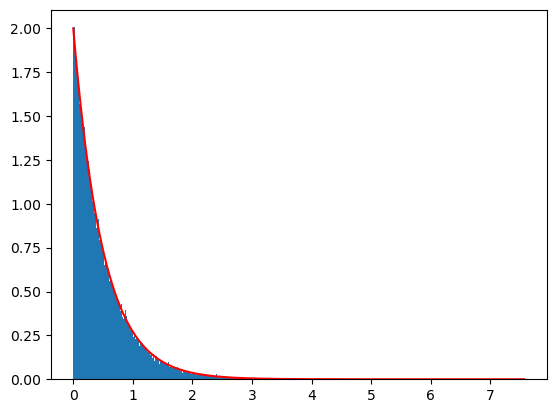

In [4]:
lam = 2
n = 100000
u = np.random.uniform(0, 1, size=n)
x = -np.log(u) / lam

x_plot = np.arange(0, np.max(x) + 1, 0.01)
plt.hist(x, bins=x_plot, density=True)
plt.plot(x_plot, lam * np.exp(-lam * x_plot), color='r')
plt.show()